<a href="https://colab.research.google.com/github/ramyasnl/Final_Project/blob/main/cleaveland_heart_disease_machn_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# columns info is extracted from 
# https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names
#raw_data = pd.read_csv(data_url,sep= ',', header = None) 

# infromation of columns
# -----------------------------------
# age : age in years
# sex : sex (1 : male , 0: female)
# cp : chest pain type
#        -- Value 1: typical angina
#        -- Value 2: atypical angina
#        -- Value 3: non-anginal pain
#        -- Value 4: asymptomatic
# trestbps : resting blood pressure
# chol : Serum cholestoral in (mg/dl)
# fbs  : fasting blood sugar > 120 mg/dl  (1: true, 0 : false)
# restecg : resting electrocardiographic results
# 	-- Value 0: normal
#       -- Value 1: having ST-T wave abnormality 
#        -- Value 2: showing probable or definite left ventricular hypertrophy
                    
# thalach : maximum heart rate (thal) achieved
# exang   : excercise induced agina (1: yes, 0: no)
# oldpeak : ST depression induced by excercise relative to rest
# slope   : the slopw of the peack excercise ST segment
#       -- Value 1: upsloping
#       -- Value 2: flat
#       -- Value 3: downsloping
# ca  : number of major vessels colored by flouroscopy (value : 0-3)
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
# target : the presence of heart disease in the patient
#       value : 0   | not present
#       value : 1-4 | distinguish presence
#--------------------------------------------------
# loading the data from data_url to raw_data set


In [ ]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
names_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names'
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
raw_data = pd.read_csv(data_url,sep= ',', names = columns)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
# 11 ca ,12 thal are objects which needs convertion to int or float
raw_data.ca = pd.to_numeric(raw_data.ca,errors='coerce').fillna(0)
raw_data.thal = pd.to_numeric(raw_data.thal,errors='coerce').fillna(0)

In [ ]:
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
raw_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


In [ ]:
# making sure the dataset to be all int and float
raw_data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

In [ ]:
 #checking for null value 
print("checking for null value :",raw_data.isnull().values.any())

checking for null value : False


In [ ]:
raw_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.702970,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.971038,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
#Checking the target column values 
# target : the presence of heart disease in the patient
#       value : 0   | not present
#       value : 1-4 | distinguish presence
raw_data.target.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [ ]:
# We can group value : 1-4 | distinguish presence AS PRESENCE oF HEART DISEASE
raw_data.loc[raw_data['target'] > 0 , 'target'] =1
raw_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


In [ ]:
# 1: young age (29-40) , 
# 2: middle age (40-55) , 
# 3: oldage(>=55)
raw_data.loc[(raw_data.age >= 29) & (raw_data.age < 40), 'age'] = 1
raw_data.loc[(raw_data.age >= 40) & (raw_data.age < 55) , 'age'] = 2
raw_data.loc[(raw_data.age >= 55) , 'age'] = 3
raw_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,2.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,3.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,3.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,3.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,1.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


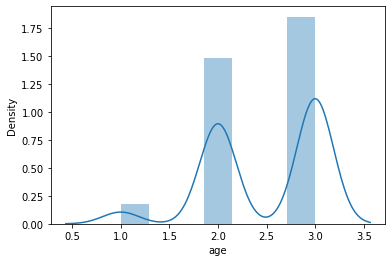

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


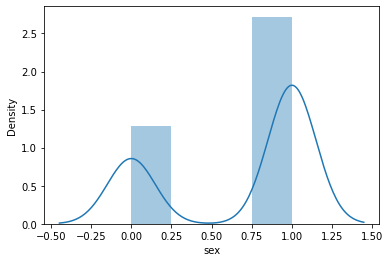

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


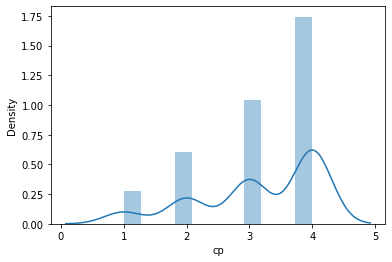

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


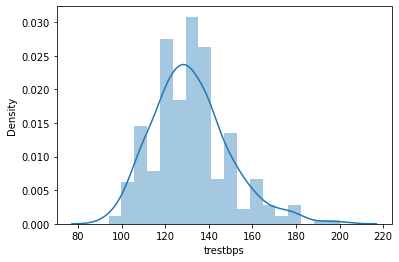

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


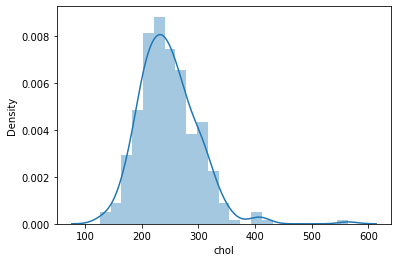

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


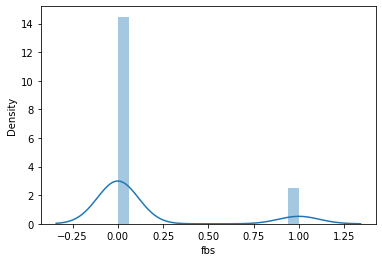

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


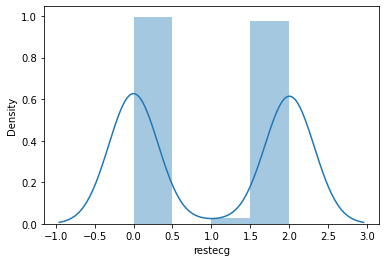

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


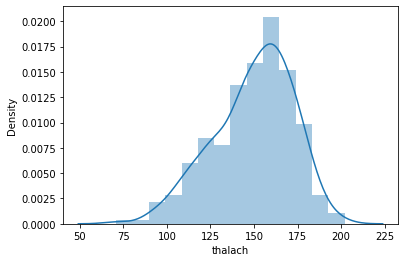

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


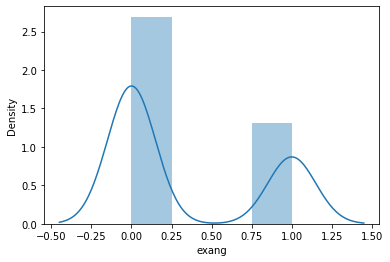

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


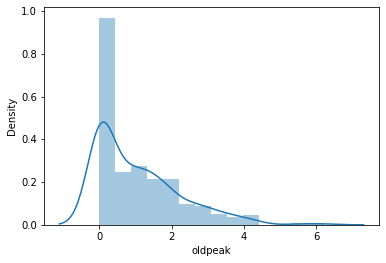

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


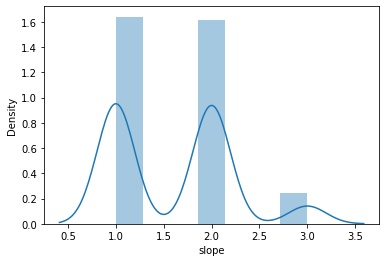

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


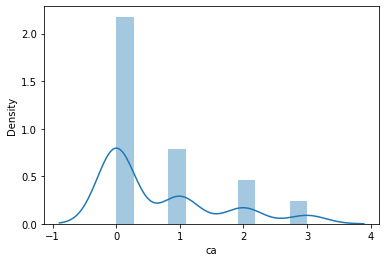

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


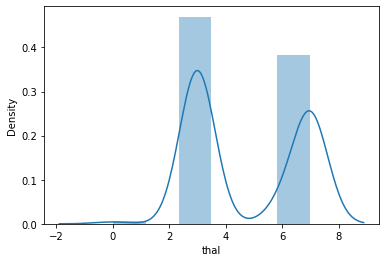

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


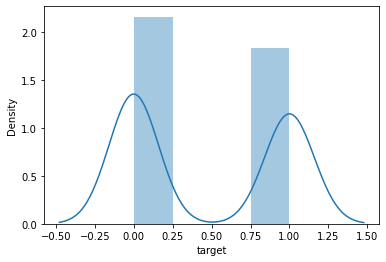

In [ ]:
for feature in columns:
    sns.distplot(raw_data[feature])
    plt.show()

In [ ]:
# correlation values between the features
raw_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.066873,0.105149,0.290151,0.200447,0.101635,0.148772,-0.358376,0.126623,0.226940,0.189950,0.310492,0.190534,0.274652
sex,-0.066873,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.378155,0.276816
cp,0.105149,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.254161,0.414446
trestbps,0.290151,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134311,0.150825
chol,0.200447,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.025190,0.085164
fbs,0.101635,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.053608,0.025264
restecg,0.148772,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.023822,0.169202
thalach,-0.358376,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.263384,-0.417167
exang,0.126623,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.316134,0.431894
oldpeak,0.226940,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.341416,0.424510


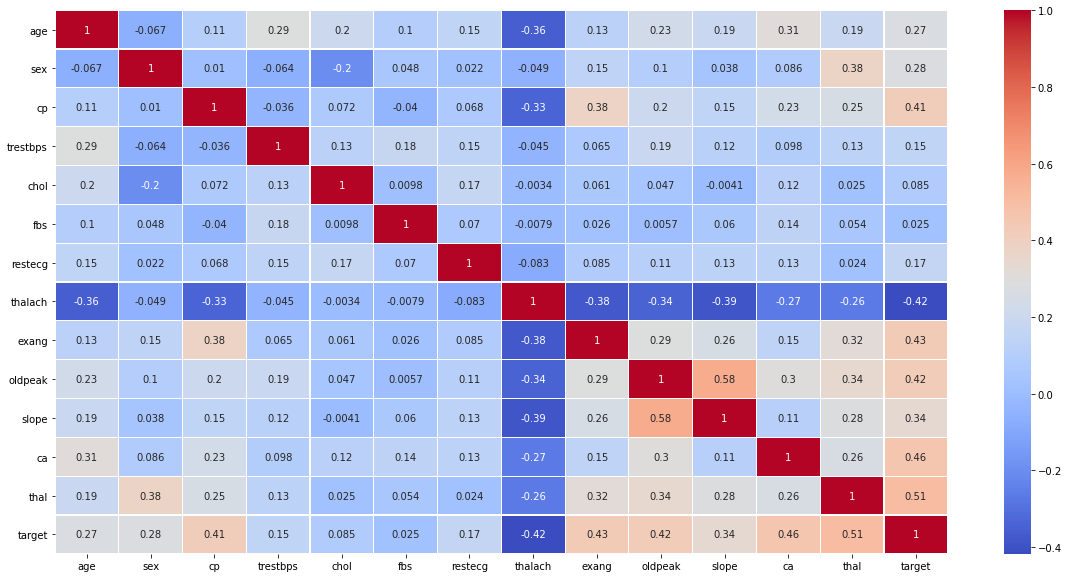

In [ ]:
# Exploratory Plot of Data using heatmap 
plt.figure(figsize=(20,10))
sns.heatmap(raw_data.corr(),cmap='coolwarm', annot = True, linewidths=.2)
plt.show()


In [ ]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
#Including All The Features 

# Using Principle Component Analysis The most commonly used Unsupervised Algorithms

In [ ]:
data_X = raw_data.drop('target',axis=1)
data_y = raw_data['target']
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
# normalize data
normal_data_X = (data_X - np.min(data_X)) / (np.max(data_X) - np.min(data_X)).values

train_X,test_X,train_y,test_y =train_test_split(normal_data_X,data_y,random_state=0,test_size=0.2)
print('test_X',test_X.shape)
print('train_X',train_X.shape)
print('test_y',test_y.shape)
print('train_y',train_X.shape)


test_X (61, 13)
train_X (242, 13)
test_y (61,)
train_y (242, 13)


In [ ]:
from sklearn.decomposition import PCA
pca=PCA().fit(train_X)
print('Explained_variance_ratio:',pca.explained_variance_ratio_)
print('train_X.columns:',train_X.columns.values.tolist())
print('PCA.components:',pca.components_)

explained_variance_ratio: [0.3328994  0.22561325 0.12572538 0.10381059 0.08235663 0.06308507
 0.04632021 0.02018947]
train_X.columns: ['age', 'sex', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
PCA.components: [[ 0.14587616  0.36770605  0.30055603  0.71874998  0.1680834   0.24575312
   0.20505939  0.32539354]
 [ 0.20317775 -0.88428136  0.21058548  0.28066822  0.07066104  0.14588694
   0.11083654 -0.12281554]
 [ 0.44865288  0.05200452  0.02764198 -0.49751721  0.16313845  0.16163242
   0.68058641  0.17827402]
 [ 0.01728584 -0.03330065 -0.38274165 -0.11173473  0.24742566  0.79740909
  -0.35634126  0.12472624]
 [ 0.52360691  0.01996963 -0.7286121   0.33189342 -0.11314443 -0.24757665
   0.03627804 -0.09484842]
 [-0.60590361 -0.01115514 -0.34699604  0.18460318  0.12483247  0.14228299
   0.57375175 -0.33653102]
 [ 0.30690374  0.2801562   0.25792156  0.00555609  0.00200773  0.23077182
  -0.06576995 -0.83855998]
 [ 0.01942857  0.00382107 -0.01609976 -0.01879738  0.92224321 -0.34862849
  -0.

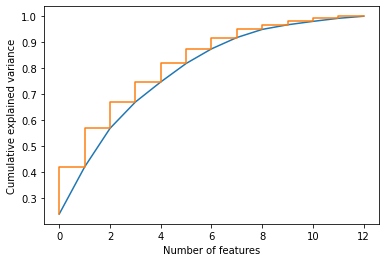

In [ ]:
cumulative_data = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_data)
plt.step([i for i in range(len(cumulative_data))],cumulative_data)
plt.xlabel('Number of features')
plt.ylabel('Cumulative explained variance')
plt.show()

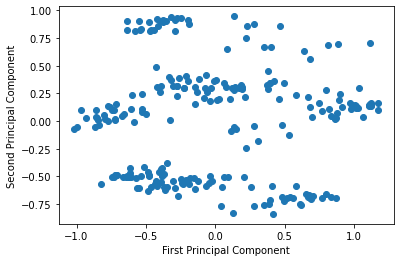

In [ ]:
pca = PCA(n_components=4)
pca.fit(train_X)
reduced_train_data = pca.transform(train_X)

plt.scatter(reduced_train_data[:, 0], reduced_train_data[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Reducing the feature like 'trestbps','chol','fbs','restecg','thalach'

In [ ]:
# drop trestbps(.16),chol(.071),fbs(0.059),restecg(.18),thalach(-0.42)
newdf = raw_data.drop(columns = ['trestbps','chol','fbs','restecg','thalach'])
newdf.head()

,age,sex,cp,exang,oldpeak,slope,ca,thal,target
0,3.0,1.0,1.0,0.0,2.3,3.0,0.0,6.0,0
1,3.0,1.0,4.0,1.0,1.5,2.0,3.0,3.0,1
2,3.0,1.0,4.0,1.0,2.6,2.0,2.0,7.0,1
3,1.0,1.0,3.0,0.0,3.5,3.0,0.0,3.0,0
4,2.0,0.0,2.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   exang    303 non-null    float64
 4   oldpeak  303 non-null    float64
 5   slope    303 non-null    float64
 6   ca       303 non-null    float64
 7   thal     303 non-null    float64
 8   target   303 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 21.4 KB


In [ ]:
# normalize data
normal_data_X = (data_X - np.min(data_X)) / (np.max(data_X) - np.min(data_X)).values

train_X,test_X,train_y,test_y =train_test_split(normal_data_X,data_y,random_state=0,test_size=0.2)
print('test_X',test_X.shape)
print('train_X',train_X.shape)
print('test_y',test_y.shape)
print('train_y',train_X.shape)

test_X (61, 8)
train_X (242, 8)
test_y (61,)
train_y (242, 8)


In [ ]:
data_X = newdf.drop('target',axis=1)
data_y = newdf['target']
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
from sklearn.decomposition import PCA
pca=PCA().fit(train_X)
print('Explained_variance_ratio:',pca.explained_variance_ratio_)
print('train_X:',train_X.columns.values.tolist())
print('PCA.components:',pca.components_)

Explained_variance_ratio: [0.3328994  0.22561325 0.12572538 0.10381059 0.08235663 0.06308507
 0.04632021 0.02018947]
train_X: ['age', 'sex', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
PCA.components: [[ 0.14587616  0.36770605  0.30055603  0.71874998  0.1680834   0.24575312
   0.20505939  0.32539354]
 [ 0.20317775 -0.88428136  0.21058548  0.28066822  0.07066104  0.14588694
   0.11083654 -0.12281554]
 [ 0.44865288  0.05200452  0.02764198 -0.49751721  0.16313845  0.16163242
   0.68058641  0.17827402]
 [ 0.01728584 -0.03330065 -0.38274165 -0.11173473  0.24742566  0.79740909
  -0.35634126  0.12472624]
 [ 0.52360691  0.01996963 -0.7286121   0.33189342 -0.11314443 -0.24757665
   0.03627804 -0.09484842]
 [-0.60590361 -0.01115514 -0.34699604  0.18460318  0.12483247  0.14228299
   0.57375175 -0.33653102]
 [ 0.30690374  0.2801562   0.25792156  0.00555609  0.00200773  0.23077182
  -0.06576995 -0.83855998]
 [ 0.01942857  0.00382107 -0.01609976 -0.01879738  0.92224321 -0.34862849
  -0.14372227

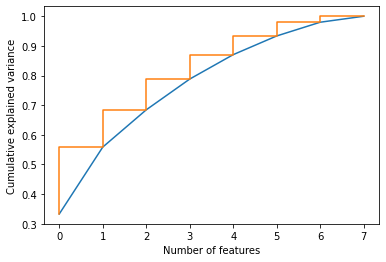

In [ ]:
cumulative_data = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_data)
plt.step([i for i in range(len(cumulative_data))],cumulative_data)
plt.xlabel('Number of features')
plt.ylabel('Cumulative explained variance')
plt.show()

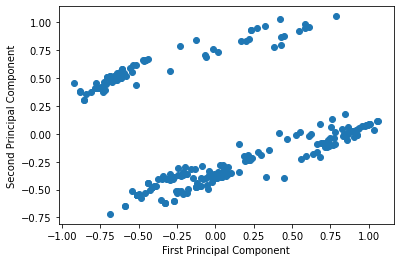

In [ ]:
import matplotlib
pca = PCA(n_components=4)
pca.fit(train_X)
reduced_train_data = pca.transform(train_X)
colors = ['red','green']
plt.scatter(reduced_train_data[:, 0], reduced_train_data[:, 1],label='reduced', cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Standardize the Data
Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. 
Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [ ]:
features = ['age', 'sex', 'cp', 'exang','oldpeak','slope','ca','thal']
X = newdf.loc[:, features].values

In [ ]:
y = newdf.loc[:,['target']].values

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
pd.DataFrame(data = X, columns = features).head()

,age,sex,cp,exang,oldpeak,slope,ca,thal
0,0.883247,0.686202,-2.251775,-0.696631,1.087338,2.274579,-0.711131,0.659133
1,0.883247,0.686202,0.877985,1.435481,0.397182,0.649113,2.504881,-0.865426
2,0.883247,0.686202,0.877985,1.435481,1.346147,0.649113,1.432877,1.167319
3,-2.504396,0.686202,-0.165268,-0.696631,2.122573,2.274579,-0.711131,-0.865426
4,-0.810575,-1.457296,-1.208521,-0.696631,0.310912,-0.976352,-0.711131,-0.865426


# PCA Projection to 2D

In [ ]:
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(X)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head(5)

,principal component 1,principal component 2
0,0.812555,0.282543
1,2.076058,0.676874
2,3.018677,-0.094775
3,0.393119,-0.597924
4,-1.977267,0.821560


In [ ]:
newdf[['target']].head()

,target
0,0
1,1
2,1
3,0
4,0


In [ ]:
finalDf = pd.concat([principalDf, newdf[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,0.812555,0.282543,0
1,2.076058,0.676874,1
2,3.018677,-0.094775,1
3,0.393119,-0.597924,0
4,-1.977267,0.821560,0


# Visualize 2D Projection
Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other?

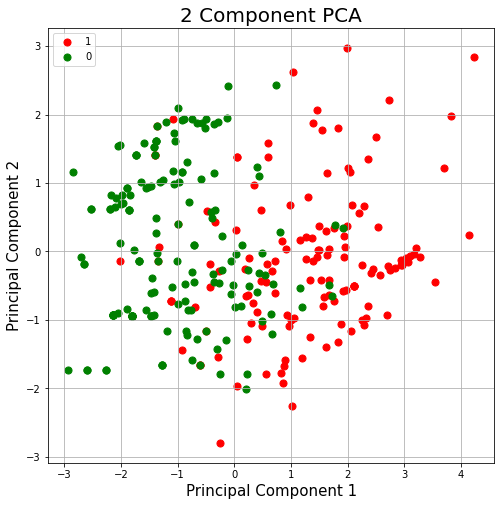

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
newdf.head()

,age,sex,cp,exang,oldpeak,slope,ca,thal,target
0,3.0,1.0,1.0,0.0,2.3,3.0,0.0,6.0,0
1,3.0,1.0,4.0,1.0,1.5,2.0,3.0,3.0,1
2,3.0,1.0,4.0,1.0,2.6,2.0,2.0,7.0,1
3,1.0,1.0,3.0,0.0,3.5,3.0,0.0,3.0,0
4,2.0,0.0,2.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# normalize data
normal_data_X = (data_X - np.min(data_X)) / (np.max(data_X) - np.min(data_X)).values

train_X,test_X,train_y,test_y =train_test_split(normal_data_X,data_y,random_state=0,test_size=0.2)
print('test_X',test_X.shape)
print('train_X',train_X.shape)
print('test_y',test_y.shape)
print('train_y',train_X.shape)

test_X (61, 8)
train_X (242, 8)
test_y (61,)
train_y (242, 8)


# Support Vector Machine (SVM) 
is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems

In [ ]:
# Accuracy of different models
accuracy_all =  {} 
# Support Vector Classifier
from sklearn import svm
svm_model = svm.SVC(C=1,kernel='poly',gamma='auto')
svm_model.fit(train_X, train_y) 
svm_prediction = svm_model.predict(test_X)
svm_accuracy = svm_model.score(test_X,test_y)
accuracy_all['SVC'] = svm_accuracy
print("Testing Accuracy of SVC Model : ",svm_accuracy)

Testing Accuracy of SVC Model :  0.8360655737704918


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(train_X, train_y)
dtc_prediction = dtc_model.predict(test_X)
dtc_accuracy = dtc_model.score(test_X,test_y)
accuracy_all['DecisionTreeClassifier'] = dtc_accuracy
print("Testing Accuracy of DecisionTreeClassifier Model : ",dtc_accuracy)

Testing Accuracy of DecisionTreeClassifier Model :  0.7704918032786885


In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf_model.fit(train_X, train_y)
rf_prediction = rf_model.predict(test_X)
rf_accuracy = rf_model.score(test_X,test_y)
accuracy_all['RandomForestClassifier'] = rf_accuracy
print("Testing Accuracy of RandomForestClassifier Model : ",rf_accuracy)

Testing Accuracy of RandomForestClassifier Model :  0.7540983606557377


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(train_X, train_y)
lr_prediction = lr_model.predict(test_X)
lr_accuracy = lr_model.score(test_X,test_y)
accuracy_all['LogisticRegression'] = lr_accuracy
print("Testing Accuracy of LogisticRegression Model : ",lr_accuracy)

Testing Accuracy of LogisticRegression Model :  0.819672131147541


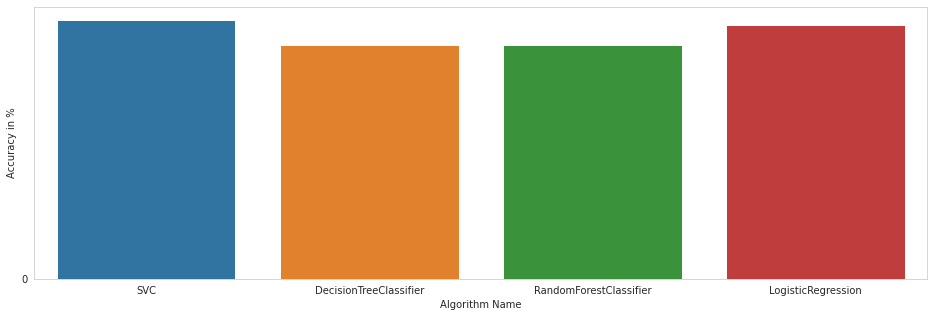

In [ ]:
#Accuracy plots of algorithms
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy in %")
plt.xlabel("Algorithm Name")
sns.barplot(y=list(accuracy_all.values()),x=list(accuracy_all.keys()))
plt.show()